<a href="https://github.com/KiarashKiani79" style="text-decoration: none; color: inherit;">
  <img src="https://skillicons.dev/icons?i=github" alt="GitHub"/>
  KiarashKiani79
</a>
<img src="https://user-images.githubusercontent.com/73097560/115834477-dbab4500-a447-11eb-908a-139a6edaec5c.gif">

#### Optical Character Recognition (OCR)
This project focuses on extracting structured text from images and enhancing it using OpenCV for more accurate results. The process involves downloading and installing Tesseract and other dependencies, loading the desired image, and using Tesseract to extract the text. The extracted text is then processed, especially for complex images, using OpenCV. Image processing operations include noise removal, threshold transformation, erosion, and drawing rectangles around specific patterns or characters. This automated Optical Character Recognition (OCR) method can be used by organizations to extract useful information from images and by individuals to save time and effort in typing. It eases the burden of document analysis and understanding. Let's get started with the project.


In [1]:
import requests
import os

# Importing IPython to clear output which is not important 
from IPython.display import clear_output

In [2]:
# Get the current directory
current_dir = os.getcwd()

# Define the path to the model folder in the current directory
model_dir = os.path.join(current_dir, 'tesseract-ocr_model')

# Create the model directory if it doesn't exist
if not os.path.exists(model_dir):
    os.makedirs(model_dir)

# Define the path to the ind.traineddata file in the model directory
path = os.path.join(model_dir, 'ind.traineddata')


First we download the `ind.traineddata` file from the Tesseract OCR’s GitHub repository and writes it to a specific location on your system. This file is a trained model for the Tesseract OCR (which is required for pytesseract library to run) to use when recognizing text in images.

In [3]:
# Download the model from the official repository
r = requests.get("https://raw.githubusercontent.com/tesseract-ocr/tessdata/4.00/ind.traineddata",
                 stream=True)

# Writing data to file to avoid path issues
with open (path, 'wb') as file:
    for block in r.iter_content(chunk_size= 1024):
        if block:
            file.write(block)

In [4]:
# Installing libraries required for optical character recognition
! apt install tesseract-ocr libtesseract-dev libmagickwand-dev

clear_output()

`tesseract-ocr`: This is the name of the package for Tesseract, an open-source optical character recognition (OCR) engine. It can be used to recognize text in images.

`libtesseract-dev`: This is the development package for Tesseract. It includes the header files and libraries needed to compile programs that use Tesseract.

`libmagickwand-dev`: This is the development package for ImageMagick’s MagickWand, a C interface to ImageMagick (a software suite to create, edit, and compose bitmap images). It allows you to work with images in your code.

In [5]:
# Installing pytesseract and opencv
! pip install pytesseract wand opencv-python
clear_output()

In [6]:
# Import libraries
from PIL import Image  # Library for image processing
import pytesseract  # Library for Optical Character Recognition (OCR)
import cv2  # OpenCV library for computer vision tasks
import numpy as np  # Library for numerical operations
from pytesseract import Output  # Output utility for pytesseract
import re  # Regular expressions library for string matching and manipulation

Read and save a sample image

In [7]:
image = Image.open(requests.get('https://i.stack.imgur.com/pbIdS.png',
                                stream=True).raw)

image.resize((300, 150))
image.save('image.png')

##### Tip
<font size="2">
By setting <b>stream=True</b>, the response content is not immediately downloaded, but instead allows for efficient streaming of the response data. Accessing <b>.raw</b> gives you direct access to the raw response content, which can then be used by the <b>Image.open()</b> function to open the image.
</font>

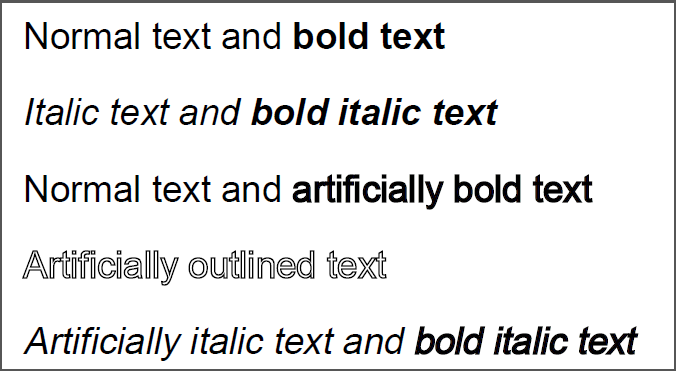

In [8]:
image

Here we will be extracting the text from image with custom configuration.

In [9]:
# Simply extracting text from image 
custom_config = r'-l eng --oem 3 --psm 6' 
text = pytesseract.image_to_string(image, config=custom_config)
print(text)

Normal text and bold text

Italic text and bold italic text

Normal text and artificially bold text
Artificially outlined text

Artificially italic text and bold italic text



##### Tip
<font size = "2">
<b>-l eng:</b> This specifies the language for OCR. Here, eng stands for English. You can change it to other language codes as needed.

<b>--oem 3:</b> This sets the OCR Engine Mode. 3 means Tesseract will use both standard and LSTM OCR engines.

<b>--psm 6:</b> This sets the Page Segmentation Mode. 6 assumes a single uniform block of text. Different modes can be used depending on the structure of the text in the image.
</font>

Now we will remove unwanted symbols from the text we extracted by replacing the symbol with an empty string.

In [10]:
# Extracting text from image and removing irrelevant symbols from characters
try:
  text=pytesseract.image_to_string(image,lang="eng")
  characters_to_remove = "!()@—*“>+-/,'|£#%$&^_~"
  new_string = text
  for character in characters_to_remove:
    new_string = new_string.replace(character, "")
  print(new_string)
except IOError as e:
    print("Error (%s)." % e)

Normal text and bold text

Italic text and bold italic text

Normal text and artificially bold text
Artificially outlined text

Artificially italic text and bold italic text




Now we will remove unwanted symbols from the text we extracted by replacing the symbol with an empty string.

In [11]:
image = cv2.imread('image.png')

Converting the images to grayscale so that it becomes less complex to process as it will have only two values 0 and 1. cv2.cvtColor() method is used to convert an image from one color space to another.

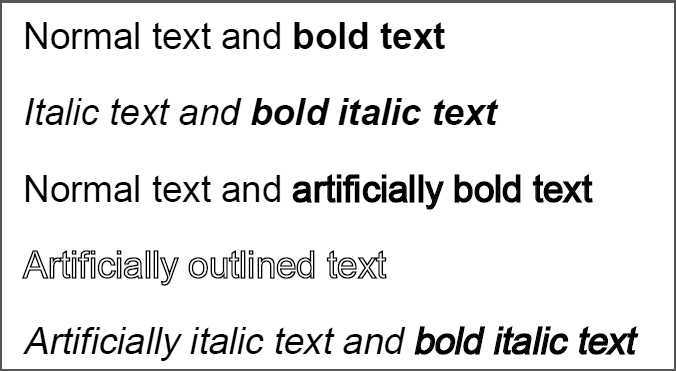

In [12]:
# Convert the image to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
Image.fromarray(gray)

`Image.fromarray(gray)`, this function is being used to create an image from a grayscale array.

Now we will blur the image so that we can remove the noise from the image. Here, the function `cv2.medianBlur()` computes the median of all the pixels under the kernel window and the central pixel is replaced with this median value. This is highly effective in removing noise.

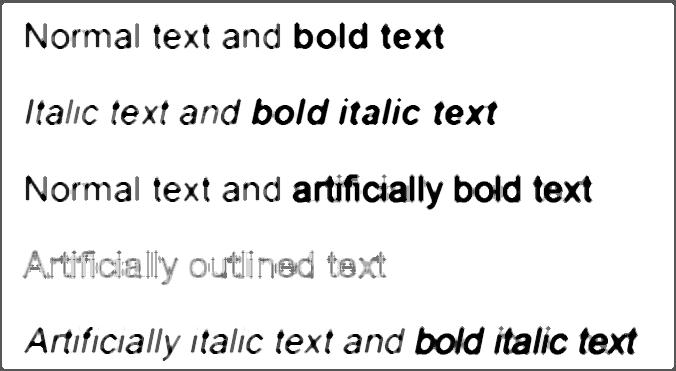

In [14]:
# remove noise
noise = cv2.medianBlur(gray,5)
Image.fromarray(noise)

We will perform threshold transformation here. 
cv2. If pixel value is greater than a threshold value, it is assigned one value (may be white), else it is assigned another value (may be black). The function used is cv2.threshold. First argument is the source image, which should be a grayscale image.


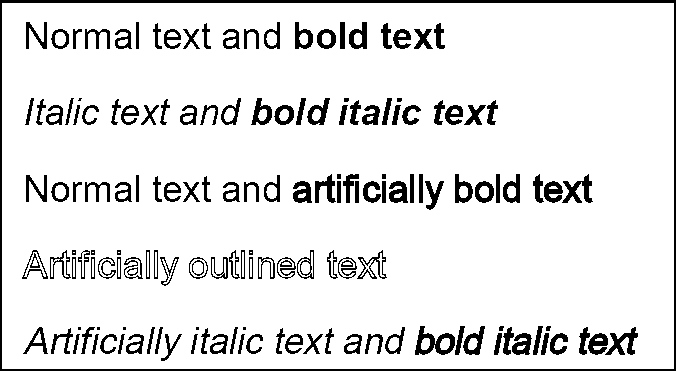

In [17]:
# Apply thresholding
thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]
Image.fromarray(thresh)